# Setup

In [1]:
import os
import sys
from pathlib import Path

# Add source directory to system path
source_dir = str(Path(os.getcwd()).parent / 'src')
sys.path.append(source_dir)

# Dataset

Data(x=[4500000, 1], edge_index=[2, 83596613], y=[60000], pos=[4500000, 2])
Label: 8


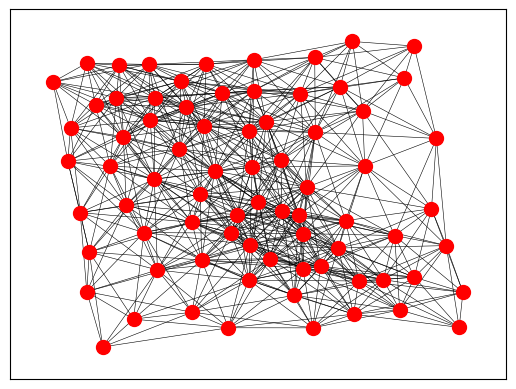

In [2]:

import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import MNISTSuperpixels


root = str(Path(os.getcwd()).parent / 'data' / 'mnist-superpixels')
trainset = MNISTSuperpixels(root=root)
testset = MNISTSuperpixels(root=root, train=False)
sample = trainset[int(np.random.sample()*len(trainset))]
print(trainset.data)
print("Label: {}".format(sample.y[0].cpu().numpy()))
G = to_networkx(sample, to_undirected=True)
nx.draw_networkx(G, with_labels=False, node_size=100, node_color="red", width=0.4)

# Model (GCN)

In [3]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 64
numLayers = 4
convLayerType = 'gcn'
dropout = 0.2

model = GNN(trainset.num_features, hiddenSize, trainset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 17930
GNN(
  (convs): ModuleList(
    (0): GCN(1, 64)
    (1): GCN(64, 64)
    (2): GCN(64, 64)
    (3): GCN(64, 64)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


# Training

In [4]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gcn', model, optimizer, replace=True)
trainer.train(trainset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gcn
Number of Saved Checkpoints Found: 0


100%|██████████| 797/797 [00:05<00:00, 146.37it/s]


Epoch 0 | Training Loss: 2.41869 | Train Acc.: 0.2820 | Valid Acc.: 0.2712


100%|██████████| 797/797 [00:03<00:00, 224.64it/s]


Epoch 1 | Training Loss: 1.80137 | Train Acc.: 0.3514 | Valid Acc.: 0.3698


100%|██████████| 797/797 [00:03<00:00, 223.67it/s]


Epoch 2 | Training Loss: 1.68381 | Train Acc.: 0.3931 | Valid Acc.: 0.3570


100%|██████████| 797/797 [00:03<00:00, 223.72it/s]


Epoch 3 | Training Loss: 1.63481 | Train Acc.: 0.4121 | Valid Acc.: 0.3487


100%|██████████| 797/797 [00:03<00:00, 222.75it/s]


Epoch 4 | Training Loss: 1.60762 | Train Acc.: 0.4249 | Valid Acc.: 0.3674


100%|██████████| 797/797 [00:03<00:00, 221.47it/s]


Epoch 5 | Training Loss: 1.59724 | Train Acc.: 0.4280 | Valid Acc.: 0.4998


100%|██████████| 797/797 [00:03<00:00, 223.70it/s]


Epoch 6 | Training Loss: 1.57255 | Train Acc.: 0.4403 | Valid Acc.: 0.4936


100%|██████████| 797/797 [00:03<00:00, 228.24it/s]


Epoch 7 | Training Loss: 1.55687 | Train Acc.: 0.4469 | Valid Acc.: 0.4756


100%|██████████| 797/797 [00:03<00:00, 227.29it/s]


Epoch 8 | Training Loss: 1.55969 | Train Acc.: 0.4462 | Valid Acc.: 0.5046


100%|██████████| 797/797 [00:03<00:00, 220.62it/s]


Epoch 9 | Training Loss: 1.54274 | Train Acc.: 0.4544 | Valid Acc.: 0.5247


100%|██████████| 797/797 [00:03<00:00, 219.93it/s]


Epoch 10 | Training Loss: 1.52634 | Train Acc.: 0.4615 | Valid Acc.: 0.4637


100%|██████████| 797/797 [00:03<00:00, 211.53it/s]


Epoch 11 | Training Loss: 1.52261 | Train Acc.: 0.4625 | Valid Acc.: 0.5167


100%|██████████| 797/797 [00:03<00:00, 227.46it/s]


Epoch 12 | Training Loss: 1.50568 | Train Acc.: 0.4678 | Valid Acc.: 0.5459


100%|██████████| 797/797 [00:03<00:00, 224.32it/s]


Epoch 13 | Training Loss: 1.52111 | Train Acc.: 0.4646 | Valid Acc.: 0.5191


100%|██████████| 797/797 [00:03<00:00, 227.18it/s]


Epoch 14 | Training Loss: 1.49313 | Train Acc.: 0.4759 | Valid Acc.: 0.5090


100%|██████████| 797/797 [00:03<00:00, 226.14it/s]


Epoch 15 | Training Loss: 1.49072 | Train Acc.: 0.4757 | Valid Acc.: 0.5388


100%|██████████| 797/797 [00:03<00:00, 225.49it/s]


Epoch 16 | Training Loss: 1.48472 | Train Acc.: 0.4793 | Valid Acc.: 0.4762


100%|██████████| 797/797 [00:03<00:00, 216.96it/s]


Epoch 17 | Training Loss: 1.46935 | Train Acc.: 0.4836 | Valid Acc.: 0.5198


100%|██████████| 797/797 [00:03<00:00, 213.86it/s]


Epoch 18 | Training Loss: 1.46081 | Train Acc.: 0.4847 | Valid Acc.: 0.5243


100%|██████████| 797/797 [00:03<00:00, 221.06it/s]


Epoch 19 | Training Loss: 1.45707 | Train Acc.: 0.4877 | Valid Acc.: 0.4793


100%|██████████| 797/797 [00:03<00:00, 214.72it/s]


Epoch 20 | Training Loss: 1.45717 | Train Acc.: 0.4899 | Valid Acc.: 0.4979


100%|██████████| 797/797 [00:03<00:00, 219.62it/s]


Epoch 21 | Training Loss: 1.44448 | Train Acc.: 0.4937 | Valid Acc.: 0.5566


100%|██████████| 797/797 [00:03<00:00, 224.16it/s]


Epoch 22 | Training Loss: 1.45346 | Train Acc.: 0.4923 | Valid Acc.: 0.5688


100%|██████████| 797/797 [00:03<00:00, 227.45it/s]


Epoch 23 | Training Loss: 1.43279 | Train Acc.: 0.4965 | Valid Acc.: 0.4994


100%|██████████| 797/797 [00:03<00:00, 226.86it/s]


Epoch 24 | Training Loss: 1.43404 | Train Acc.: 0.5005 | Valid Acc.: 0.5721


100%|██████████| 797/797 [00:03<00:00, 218.37it/s]


Epoch 25 | Training Loss: 1.40963 | Train Acc.: 0.5053 | Valid Acc.: 0.5372


100%|██████████| 797/797 [00:03<00:00, 221.36it/s]


Epoch 26 | Training Loss: 1.44287 | Train Acc.: 0.4954 | Valid Acc.: 0.5697


100%|██████████| 797/797 [00:03<00:00, 229.21it/s]


Epoch 27 | Training Loss: 1.42573 | Train Acc.: 0.5022 | Valid Acc.: 0.5632


100%|██████████| 797/797 [00:03<00:00, 229.69it/s]


Epoch 28 | Training Loss: 1.44123 | Train Acc.: 0.4985 | Valid Acc.: 0.5532


100%|██████████| 797/797 [00:03<00:00, 228.31it/s]


Epoch 29 | Training Loss: 1.41309 | Train Acc.: 0.5051 | Valid Acc.: 0.5468


100%|██████████| 797/797 [00:03<00:00, 210.13it/s]


Epoch 30 | Training Loss: 1.41356 | Train Acc.: 0.5055 | Valid Acc.: 0.5104


100%|██████████| 797/797 [00:03<00:00, 202.59it/s]


Epoch 31 | Training Loss: 1.41538 | Train Acc.: 0.5096 | Valid Acc.: 0.5287


100%|██████████| 797/797 [00:03<00:00, 215.87it/s]


Epoch 32 | Training Loss: 1.40449 | Train Acc.: 0.5100 | Valid Acc.: 0.5571


100%|██████████| 797/797 [00:03<00:00, 238.71it/s]


Epoch 33 | Training Loss: 1.41504 | Train Acc.: 0.5088 | Valid Acc.: 0.5032


100%|██████████| 797/797 [00:03<00:00, 237.35it/s]


Epoch 34 | Training Loss: 1.41255 | Train Acc.: 0.5061 | Valid Acc.: 0.5651


100%|██████████| 797/797 [00:03<00:00, 219.56it/s]


Epoch 35 | Training Loss: 1.41665 | Train Acc.: 0.5071 | Valid Acc.: 0.5789


100%|██████████| 797/797 [00:03<00:00, 215.74it/s]


Epoch 36 | Training Loss: 1.41244 | Train Acc.: 0.5072 | Valid Acc.: 0.5691


100%|██████████| 797/797 [00:03<00:00, 229.91it/s]


Epoch 37 | Training Loss: 1.41699 | Train Acc.: 0.5077 | Valid Acc.: 0.5902


100%|██████████| 797/797 [00:03<00:00, 226.42it/s]


Epoch 38 | Training Loss: 1.39691 | Train Acc.: 0.5142 | Valid Acc.: 0.6040


100%|██████████| 797/797 [00:03<00:00, 233.42it/s]


Epoch 39 | Training Loss: 1.39257 | Train Acc.: 0.5155 | Valid Acc.: 0.5811


100%|██████████| 797/797 [00:03<00:00, 238.35it/s]


Epoch 40 | Training Loss: 1.41834 | Train Acc.: 0.5084 | Valid Acc.: 0.5566


100%|██████████| 797/797 [00:03<00:00, 209.91it/s]


Epoch 41 | Training Loss: 1.39368 | Train Acc.: 0.5144 | Valid Acc.: 0.5424


100%|██████████| 797/797 [00:03<00:00, 230.67it/s]


Epoch 42 | Training Loss: 1.40022 | Train Acc.: 0.5131 | Valid Acc.: 0.5120


100%|██████████| 797/797 [00:03<00:00, 227.30it/s]


Epoch 43 | Training Loss: 1.37743 | Train Acc.: 0.5193 | Valid Acc.: 0.5934


100%|██████████| 797/797 [00:03<00:00, 222.98it/s]


Epoch 44 | Training Loss: 1.39839 | Train Acc.: 0.5133 | Valid Acc.: 0.5589


100%|██████████| 797/797 [00:03<00:00, 225.29it/s]


Epoch 45 | Training Loss: 1.38292 | Train Acc.: 0.5200 | Valid Acc.: 0.5750


100%|██████████| 797/797 [00:03<00:00, 220.78it/s]


Epoch 46 | Training Loss: 1.39379 | Train Acc.: 0.5158 | Valid Acc.: 0.5929


100%|██████████| 797/797 [00:03<00:00, 222.09it/s]


Epoch 47 | Training Loss: 1.37630 | Train Acc.: 0.5208 | Valid Acc.: 0.5398


100%|██████████| 797/797 [00:03<00:00, 224.84it/s]


Epoch 48 | Training Loss: 1.38250 | Train Acc.: 0.5206 | Valid Acc.: 0.5332


100%|██████████| 797/797 [00:03<00:00, 219.42it/s]


Epoch 49 | Training Loss: 1.40029 | Train Acc.: 0.5169 | Valid Acc.: 0.6090


100%|██████████| 797/797 [00:03<00:00, 225.09it/s]


Epoch 50 | Training Loss: 1.37464 | Train Acc.: 0.5205 | Valid Acc.: 0.5944


100%|██████████| 797/797 [00:03<00:00, 223.92it/s]


Epoch 51 | Training Loss: 1.37965 | Train Acc.: 0.5192 | Valid Acc.: 0.5627


100%|██████████| 797/797 [00:03<00:00, 224.77it/s]


Epoch 52 | Training Loss: 1.37551 | Train Acc.: 0.5223 | Valid Acc.: 0.5741


100%|██████████| 797/797 [00:03<00:00, 231.01it/s]


Epoch 53 | Training Loss: 1.38441 | Train Acc.: 0.5194 | Valid Acc.: 0.5566


100%|██████████| 797/797 [00:03<00:00, 224.38it/s]


Epoch 54 | Training Loss: 1.37765 | Train Acc.: 0.5193 | Valid Acc.: 0.5657


100%|██████████| 797/797 [00:03<00:00, 228.36it/s]


Epoch 55 | Training Loss: 1.37935 | Train Acc.: 0.5215 | Valid Acc.: 0.5986


100%|██████████| 797/797 [00:03<00:00, 228.14it/s]


Epoch 56 | Training Loss: 1.37918 | Train Acc.: 0.5227 | Valid Acc.: 0.5953


100%|██████████| 797/797 [00:03<00:00, 225.59it/s]


Epoch 57 | Training Loss: 1.36525 | Train Acc.: 0.5265 | Valid Acc.: 0.6026


100%|██████████| 797/797 [00:03<00:00, 228.18it/s]


Epoch 58 | Training Loss: 1.38155 | Train Acc.: 0.5213 | Valid Acc.: 0.5914


100%|██████████| 797/797 [00:03<00:00, 226.48it/s]


Epoch 59 | Training Loss: 1.36906 | Train Acc.: 0.5249 | Valid Acc.: 0.5969


100%|██████████| 797/797 [00:03<00:00, 223.34it/s]


Epoch 60 | Training Loss: 1.38376 | Train Acc.: 0.5196 | Valid Acc.: 0.5592


100%|██████████| 797/797 [00:03<00:00, 227.89it/s]


Epoch 61 | Training Loss: 1.36818 | Train Acc.: 0.5249 | Valid Acc.: 0.5280


100%|██████████| 797/797 [00:03<00:00, 221.19it/s]


Epoch 62 | Training Loss: 1.37408 | Train Acc.: 0.5241 | Valid Acc.: 0.5698


100%|██████████| 797/797 [00:03<00:00, 222.81it/s]


Epoch 63 | Training Loss: 1.36155 | Train Acc.: 0.5250 | Valid Acc.: 0.6110


100%|██████████| 797/797 [00:03<00:00, 228.89it/s]


Epoch 64 | Training Loss: 1.36264 | Train Acc.: 0.5273 | Valid Acc.: 0.6269


100%|██████████| 797/797 [00:03<00:00, 211.78it/s]


Epoch 65 | Training Loss: 1.36620 | Train Acc.: 0.5282 | Valid Acc.: 0.6029


100%|██████████| 797/797 [00:03<00:00, 226.20it/s]


Epoch 66 | Training Loss: 1.36539 | Train Acc.: 0.5264 | Valid Acc.: 0.5736


100%|██████████| 797/797 [00:03<00:00, 229.02it/s]


Epoch 67 | Training Loss: 1.36375 | Train Acc.: 0.5279 | Valid Acc.: 0.5833


100%|██████████| 797/797 [00:03<00:00, 218.20it/s]


Epoch 68 | Training Loss: 1.36336 | Train Acc.: 0.5272 | Valid Acc.: 0.5964


100%|██████████| 797/797 [00:03<00:00, 226.44it/s]


Epoch 69 | Training Loss: 1.36079 | Train Acc.: 0.5295 | Valid Acc.: 0.5806


100%|██████████| 797/797 [00:03<00:00, 229.08it/s]


Epoch 70 | Training Loss: 1.36188 | Train Acc.: 0.5297 | Valid Acc.: 0.6230


100%|██████████| 797/797 [00:03<00:00, 227.38it/s]


Epoch 71 | Training Loss: 1.36489 | Train Acc.: 0.5278 | Valid Acc.: 0.6059


100%|██████████| 797/797 [00:03<00:00, 230.16it/s]


Epoch 72 | Training Loss: 1.36787 | Train Acc.: 0.5261 | Valid Acc.: 0.5960


100%|██████████| 797/797 [00:03<00:00, 230.85it/s]


Epoch 73 | Training Loss: 1.35856 | Train Acc.: 0.5267 | Valid Acc.: 0.6020


100%|██████████| 797/797 [00:03<00:00, 230.10it/s]


Epoch 74 | Training Loss: 1.36229 | Train Acc.: 0.5278 | Valid Acc.: 0.5559


100%|██████████| 797/797 [00:03<00:00, 232.01it/s]


Epoch 75 | Training Loss: 1.36696 | Train Acc.: 0.5254 | Valid Acc.: 0.5909


100%|██████████| 797/797 [00:03<00:00, 224.99it/s]


Epoch 76 | Training Loss: 1.35429 | Train Acc.: 0.5313 | Valid Acc.: 0.5978


100%|██████████| 797/797 [00:03<00:00, 222.56it/s]


Epoch 77 | Training Loss: 1.36884 | Train Acc.: 0.5263 | Valid Acc.: 0.5100


100%|██████████| 797/797 [00:03<00:00, 218.97it/s]


Epoch 78 | Training Loss: 1.35571 | Train Acc.: 0.5301 | Valid Acc.: 0.5999


100%|██████████| 797/797 [00:03<00:00, 222.92it/s]


Epoch 79 | Training Loss: 1.34705 | Train Acc.: 0.5294 | Valid Acc.: 0.5763


100%|██████████| 797/797 [00:03<00:00, 216.95it/s]


Epoch 80 | Training Loss: 1.35509 | Train Acc.: 0.5297 | Valid Acc.: 0.5937


100%|██████████| 797/797 [00:03<00:00, 229.13it/s]


Epoch 81 | Training Loss: 1.35689 | Train Acc.: 0.5311 | Valid Acc.: 0.5488


100%|██████████| 797/797 [00:03<00:00, 229.11it/s]


Epoch 82 | Training Loss: 1.34906 | Train Acc.: 0.5324 | Valid Acc.: 0.5828


100%|██████████| 797/797 [00:03<00:00, 228.77it/s]


Epoch 83 | Training Loss: 1.35434 | Train Acc.: 0.5309 | Valid Acc.: 0.6298


100%|██████████| 797/797 [00:03<00:00, 229.49it/s]


Epoch 84 | Training Loss: 1.34440 | Train Acc.: 0.5326 | Valid Acc.: 0.5879


100%|██████████| 797/797 [00:03<00:00, 223.79it/s]


Epoch 85 | Training Loss: 1.35305 | Train Acc.: 0.5320 | Valid Acc.: 0.6198


100%|██████████| 797/797 [00:03<00:00, 229.87it/s]


Epoch 86 | Training Loss: 1.35271 | Train Acc.: 0.5278 | Valid Acc.: 0.6272


100%|██████████| 797/797 [00:03<00:00, 228.46it/s]


Epoch 87 | Training Loss: 1.35104 | Train Acc.: 0.5333 | Valid Acc.: 0.6040


100%|██████████| 797/797 [00:03<00:00, 227.40it/s]


Epoch 88 | Training Loss: 1.35589 | Train Acc.: 0.5323 | Valid Acc.: 0.5881


100%|██████████| 797/797 [00:03<00:00, 228.44it/s]


Epoch 89 | Training Loss: 1.34792 | Train Acc.: 0.5341 | Valid Acc.: 0.6138


100%|██████████| 797/797 [00:03<00:00, 227.85it/s]


Epoch 90 | Training Loss: 1.34580 | Train Acc.: 0.5346 | Valid Acc.: 0.5649


100%|██████████| 797/797 [00:03<00:00, 227.82it/s]


Epoch 91 | Training Loss: 1.34245 | Train Acc.: 0.5357 | Valid Acc.: 0.5876


100%|██████████| 797/797 [00:03<00:00, 227.95it/s]


Epoch 92 | Training Loss: 1.34672 | Train Acc.: 0.5322 | Valid Acc.: 0.5866


100%|██████████| 797/797 [00:03<00:00, 228.96it/s]


Epoch 93 | Training Loss: 1.34694 | Train Acc.: 0.5360 | Valid Acc.: 0.5900


100%|██████████| 797/797 [00:03<00:00, 228.75it/s]


Epoch 94 | Training Loss: 1.34154 | Train Acc.: 0.5356 | Valid Acc.: 0.6234


100%|██████████| 797/797 [00:03<00:00, 212.17it/s]


Epoch 95 | Training Loss: 1.33597 | Train Acc.: 0.5359 | Valid Acc.: 0.5928


100%|██████████| 797/797 [00:03<00:00, 216.03it/s]


Epoch 96 | Training Loss: 1.33732 | Train Acc.: 0.5373 | Valid Acc.: 0.6190


100%|██████████| 797/797 [00:03<00:00, 221.05it/s]


Epoch 97 | Training Loss: 1.34537 | Train Acc.: 0.5366 | Valid Acc.: 0.5852


100%|██████████| 797/797 [00:03<00:00, 219.51it/s]


Epoch 98 | Training Loss: 1.34078 | Train Acc.: 0.5367 | Valid Acc.: 0.5951


100%|██████████| 797/797 [00:03<00:00, 221.11it/s]


Epoch 99 | Training Loss: 1.33005 | Train Acc.: 0.5393 | Valid Acc.: 0.5896


In [5]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gcn', model, optimizer, replace=False)
trainer.test(testset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gcn
Number of Saved Checkpoints Found: 10
Testing Acc.: 0.5519


# Model (GraphSAGE)

In [7]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 64
numLayers = 4
convLayerType = 'sage'
dropout = 0.2

model = GNN(trainset.num_features, hiddenSize, trainset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 30538
GNN(
  (convs): ModuleList(
    (0): GraphSage(1, 64)
    (1): GraphSage(64, 64)
    (2): GraphSage(64, 64)
    (3): GraphSage(64, 64)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


# Training

In [8]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'graphsage', model, optimizer, replace=False)
trainer.train(trainset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/graphsage
Number of Saved Checkpoints Found: 9


100%|██████████| 797/797 [00:07<00:00, 108.01it/s]


Epoch 81 | Training Loss: 0.67350 | Train Acc.: 0.7817 | Valid Acc.: 0.8336


100%|██████████| 797/797 [00:05<00:00, 135.55it/s]


Epoch 82 | Training Loss: 0.69658 | Train Acc.: 0.7755 | Valid Acc.: 0.8511


100%|██████████| 797/797 [00:05<00:00, 136.38it/s]


Epoch 83 | Training Loss: 0.68041 | Train Acc.: 0.7778 | Valid Acc.: 0.8459


100%|██████████| 797/797 [00:05<00:00, 134.51it/s]


Epoch 84 | Training Loss: 0.68832 | Train Acc.: 0.7789 | Valid Acc.: 0.7827


100%|██████████| 797/797 [00:05<00:00, 136.22it/s]


Epoch 85 | Training Loss: 0.66441 | Train Acc.: 0.7844 | Valid Acc.: 0.8533


100%|██████████| 797/797 [00:05<00:00, 134.50it/s]


Epoch 86 | Training Loss: 0.67892 | Train Acc.: 0.7820 | Valid Acc.: 0.8499


100%|██████████| 797/797 [00:05<00:00, 136.82it/s]


Epoch 87 | Training Loss: 0.67893 | Train Acc.: 0.7804 | Valid Acc.: 0.8384


100%|██████████| 797/797 [00:05<00:00, 134.82it/s]


Epoch 88 | Training Loss: 0.67026 | Train Acc.: 0.7816 | Valid Acc.: 0.8613


100%|██████████| 797/797 [00:05<00:00, 137.29it/s]


Epoch 89 | Training Loss: 0.67612 | Train Acc.: 0.7808 | Valid Acc.: 0.8280


100%|██████████| 797/797 [00:05<00:00, 137.10it/s]


Epoch 90 | Training Loss: 0.69407 | Train Acc.: 0.7761 | Valid Acc.: 0.8439


100%|██████████| 797/797 [00:05<00:00, 134.79it/s]


Epoch 91 | Training Loss: 0.67966 | Train Acc.: 0.7822 | Valid Acc.: 0.8506


100%|██████████| 797/797 [00:05<00:00, 137.00it/s]


Epoch 92 | Training Loss: 0.67590 | Train Acc.: 0.7809 | Valid Acc.: 0.8517


100%|██████████| 797/797 [00:05<00:00, 135.09it/s]


Epoch 93 | Training Loss: 0.67019 | Train Acc.: 0.7833 | Valid Acc.: 0.8501


100%|██████████| 797/797 [00:05<00:00, 137.30it/s]


Epoch 94 | Training Loss: 0.67743 | Train Acc.: 0.7808 | Valid Acc.: 0.8569


100%|██████████| 797/797 [00:05<00:00, 136.31it/s]


Epoch 95 | Training Loss: 0.67503 | Train Acc.: 0.7801 | Valid Acc.: 0.8472


100%|██████████| 797/797 [00:05<00:00, 135.17it/s]


Epoch 96 | Training Loss: 0.67035 | Train Acc.: 0.7823 | Valid Acc.: 0.8428


100%|██████████| 797/797 [00:05<00:00, 135.92it/s]


Epoch 97 | Training Loss: 0.67355 | Train Acc.: 0.7838 | Valid Acc.: 0.8499


100%|██████████| 797/797 [00:05<00:00, 134.97it/s]


Epoch 98 | Training Loss: 0.66488 | Train Acc.: 0.7851 | Valid Acc.: 0.8520


100%|██████████| 797/797 [00:05<00:00, 133.87it/s]


Epoch 99 | Training Loss: 0.66678 | Train Acc.: 0.7843 | Valid Acc.: 0.8581


100%|██████████| 797/797 [00:05<00:00, 136.71it/s]


Epoch 100 | Training Loss: 0.67649 | Train Acc.: 0.7838 | Valid Acc.: 0.8567


 92%|█████████▏| 735/797 [00:05<00:00, 133.02it/s]


KeyboardInterrupt: 

In [9]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'graphsage', model, optimizer, replace=False)
trainer.test(testset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/graphsage
Number of Saved Checkpoints Found: 11
Testing Acc.: 0.8307


# Model (GAT)

In [15]:
# Initialize Model and Optimizer
import torch
from models import GNN

hiddenSize = 64
numLayers = 4
convLayerType = 'gat'
dropout = 0.2
model = GNN(trainset.num_features, hiddenSize, trainset.num_classes, numLayers=numLayers, convLayerType=convLayerType, dropout=dropout, heads=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
print("Number of Model Parameters: {}".format(sum(p.numel() for p in model.parameters())))
print(model)

Number of Model Parameters: 60746
GNN(
  (convs): ModuleList(
    (0): GAT(1, 64)
    (1): GAT(128, 64)
    (2): GAT(128, 64)
    (3): GAT(128, 64)
  )
  (bns): ModuleList(
    (0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (postMP): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): Dropout(p=0.2, inplace=False)
    (2): Linear(in_features=64, out_features=10, bias=True)
  )
  (logSoftmax): LogSoftmax(dim=1)
)


# Training

In [17]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gat', model, optimizer, replace=False)
trainer.train(trainset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gat
Number of Saved Checkpoints Found: 10


100%|██████████| 797/797 [00:22<00:00, 35.16it/s]


Epoch 91 | Training Loss: 0.92782 | Train Acc.: 0.6918 | Valid Acc.: 0.3507


100%|██████████| 797/797 [00:22<00:00, 36.23it/s]


Epoch 92 | Training Loss: 0.90293 | Train Acc.: 0.7042 | Valid Acc.: 0.3776


100%|██████████| 797/797 [00:21<00:00, 36.63it/s]


Epoch 93 | Training Loss: 0.91029 | Train Acc.: 0.6986 | Valid Acc.: 0.7118


100%|██████████| 797/797 [00:21<00:00, 36.76it/s]


Epoch 94 | Training Loss: 0.90343 | Train Acc.: 0.7022 | Valid Acc.: 0.6864


100%|██████████| 797/797 [00:22<00:00, 35.60it/s]


Epoch 95 | Training Loss: 0.92032 | Train Acc.: 0.6985 | Valid Acc.: 0.6647


100%|██████████| 797/797 [00:22<00:00, 36.13it/s]


Epoch 96 | Training Loss: 0.92741 | Train Acc.: 0.6958 | Valid Acc.: 0.7001


100%|██████████| 797/797 [00:22<00:00, 35.88it/s]


Epoch 97 | Training Loss: 0.93910 | Train Acc.: 0.6897 | Valid Acc.: 0.7018


100%|██████████| 797/797 [00:22<00:00, 35.66it/s]


Epoch 98 | Training Loss: 0.93247 | Train Acc.: 0.6901 | Valid Acc.: 0.3740


100%|██████████| 797/797 [00:22<00:00, 35.92it/s]


Epoch 99 | Training Loss: 0.94149 | Train Acc.: 0.6883 | Valid Acc.: 0.4128


100%|██████████| 797/797 [00:22<00:00, 36.16it/s]


Epoch 100 | Training Loss: 0.92266 | Train Acc.: 0.6957 | Valid Acc.: 0.1446


100%|██████████| 797/797 [00:22<00:00, 36.09it/s]


Epoch 101 | Training Loss: 0.94024 | Train Acc.: 0.6888 | Valid Acc.: 0.6704


100%|██████████| 797/797 [00:22<00:00, 34.70it/s]


Epoch 102 | Training Loss: 0.92448 | Train Acc.: 0.6958 | Valid Acc.: 0.6853


100%|██████████| 797/797 [00:22<00:00, 35.62it/s]


Epoch 103 | Training Loss: 0.93046 | Train Acc.: 0.6909 | Valid Acc.: 0.6807


100%|██████████| 797/797 [00:22<00:00, 36.02it/s]


Epoch 104 | Training Loss: 0.93182 | Train Acc.: 0.6913 | Valid Acc.: 0.6096


100%|██████████| 797/797 [00:22<00:00, 35.59it/s]


Epoch 105 | Training Loss: 0.92859 | Train Acc.: 0.6918 | Valid Acc.: 0.4727


100%|██████████| 797/797 [00:22<00:00, 36.07it/s]


Epoch 106 | Training Loss: 0.93874 | Train Acc.: 0.6880 | Valid Acc.: 0.4983


100%|██████████| 797/797 [00:22<00:00, 34.80it/s]


Epoch 107 | Training Loss: 0.93403 | Train Acc.: 0.6898 | Valid Acc.: 0.4723


100%|██████████| 797/797 [00:21<00:00, 36.99it/s]


Epoch 108 | Training Loss: 0.92683 | Train Acc.: 0.6917 | Valid Acc.: 0.3316


100%|██████████| 797/797 [00:21<00:00, 36.91it/s]


Epoch 109 | Training Loss: 0.95790 | Train Acc.: 0.6834 | Valid Acc.: 0.7396


100%|██████████| 797/797 [00:21<00:00, 36.96it/s]


Epoch 110 | Training Loss: 0.94144 | Train Acc.: 0.6867 | Valid Acc.: 0.5960


100%|██████████| 797/797 [00:22<00:00, 35.73it/s]


Epoch 111 | Training Loss: 0.93361 | Train Acc.: 0.6940 | Valid Acc.: 0.7060


 35%|███▍      | 275/797 [00:08<00:15, 34.27it/s]


KeyboardInterrupt: 

In [18]:
from pipeline import Trainer
trainer = Trainer(str(Path(os.getcwd()).parent), 'gat', model, optimizer, replace=False)
trainer.test(testset)

Loading Model Checkpoints at: /home/chankyo/Documents/stanford/cs224w/cs224w-final-project/model/gat
Number of Saved Checkpoints Found: 12
Testing Acc.: 0.5725
